## Day 30 Lecture 2 Assignment

In this assignment, we will learn about random forests. We will use the google play store dataset loaded below.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In this assignment, you will work more independently. Perform the following steps:
    
1. Select which columns are best suited to predict whether the rating is above 4.5
2. Process the data (including transforming to the correct column type, removing missing values, creating dummy variables, and removing irrelevant variables)
3. Create a random forest model and evaluate
4. Using grid search cross validation, tweak the parameters to produce a better performing model
5. Show and discuss your results

Good luck!

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
#Unique value counts per column
categorical = reviews.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print({i:column.nunique()})

{'App': 9660}
{'Category': 34}
{'Reviews': 6002}
{'Size': 462}
{'Installs': 22}
{'Type': 3}
{'Price': 93}
{'Content Rating': 6}
{'Genres': 120}
{'Last Updated': 1378}
{'Current Ver': 2832}
{'Android Ver': 33}


In [18]:
reviews['High_Rating'] = np.where(reviews['Rating'] > 4.5, 1, 0)#.astype(float)
reviews2 = reviews.dropna(axis='index')
reviews3 = reviews2.drop(columns=['App', 'Size', 'Installs', 'Last Updated', 'Current Ver', 'Android Ver'], axis='columns')
reviews3['Price'] = reviews3['Price'].str.replace('[\$,]', '', regex=True).astype(float)
reviews4 = reviews3.copy()
reviews4['Reviews'] = reviews3['Reviews'].astype(float)
reviews4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   float64
 3   Type            9360 non-null   object 
 4   Price           9360 non-null   float64
 5   Content Rating  9360 non-null   object 
 6   Genres          9360 non-null   object 
 7   High_Rating     9360 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 658.1+ KB


In [19]:
reviews4

,Category,Rating,Reviews,Type,Price,Content Rating,Genres,High_Rating
0,ART_AND_DESIGN,4.1,159.0,Free,0.0,Everyone,Art & Design,0
1,ART_AND_DESIGN,3.9,967.0,Free,0.0,Everyone,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,4.7,87510.0,Free,0.0,Everyone,Art & Design,1
3,ART_AND_DESIGN,4.5,215644.0,Free,0.0,Teen,Art & Design,0
4,ART_AND_DESIGN,4.3,967.0,Free,0.0,Everyone,Art & Design;Creativity,0
...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7.0,Free,0.0,Everyone,Education,0
10836,FAMILY,4.5,38.0,Free,0.0,Everyone,Education,0
10837,FAMILY,5.0,4.0,Free,0.0,Everyone,Education,1
10839,BOOKS_AND_REFERENCE,4.5,114.0,Free,0.0,Mature 17+,Books & Reference,0


In [20]:
categorical = reviews4.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print({i:column.nunique()})

{'Category': 33}
{'Type': 2}
{'Content Rating': 6}
{'Genres': 115}


In [34]:
# Not sure how to go about splitting the genres combined by ';', 
# but if possible that would probably allow for better formulation of a training set.
reviews4.Genres.value_counts(ascending=True).head(20)

Entertainment;Education                1
Travel & Local;Action & Adventure      1
Role Playing;Brain Games               1
Strategy;Education                     1
Tools;Education                        1
Music & Audio;Music & Video            1
Arcade;Pretend Play                    1
Puzzle;Education                       1
Card;Brain Games                       1
Comics;Creativity                      1
Lifestyle;Pretend Play                 1
Board;Pretend Play                     1
Health & Fitness;Education             1
Health & Fitness;Action & Adventure    1
Racing;Pretend Play                    1
Communication;Creativity               1
Parenting;Brain Games                  1
Strategy;Creativity                    1
Adventure;Brain Games                  1
Lifestyle;Education                    1
Name: Genres, dtype: int64

Create a random forest model and evaluate
Using grid search cross validation, tweak the parameters to produce a better performing model
Show and discuss your results

In [21]:
!pip install category_encoders

In [22]:
from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.model_selection import  train_test_split

loe = LeaveOneOutEncoder()

y = reviews4.High_Rating
X = reviews4.drop(columns=['Rating', 'High_Rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [23]:
loe.fit(X_train, y_train)

X_train_loe = loe.transform(X_train)
X_test_loe = loe.transform(X_test)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = { 
    "criterion": ['gini', 'entropy'], 
    "max_depth": [5, 10, 15, 25, 50], 
    "min_samples_split": [25, 50, 75, 100], 
    "max_features":['auto', 'sqrt', 'log2']}

rf = RandomForestClassifier()

rf_cv = GridSearchCV(rf, param_grid=param_grid, verbose=1, cv=5)
rf_cv.fit(X_train_loe, y_train)
rf_cv.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  5.3min finished


{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 25}

In [25]:
from sklearn.metrics import classification_report

y_pred = rf_cv.predict(X_test_loe)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1876
           1       0.52      0.21      0.30       464

    accuracy                           0.81      2340
   macro avg       0.68      0.58      0.59      2340
weighted avg       0.77      0.81      0.77      2340



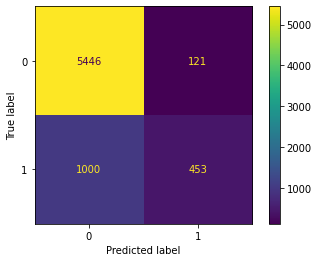

In [26]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(rf_cv,X_train_loe, y_train, values_format='.5g')
plt.show()

In [27]:
train_score = rf_cv.score(X_train_loe, y_train)
test_score = rf_cv.score(X_test_loe, y_test)
print('Train Score: {:.4f}'.format(train_score))
print('Test Score: {:.4f}'.format(test_score))

Train Score: 0.8403
Test Score: 0.8051


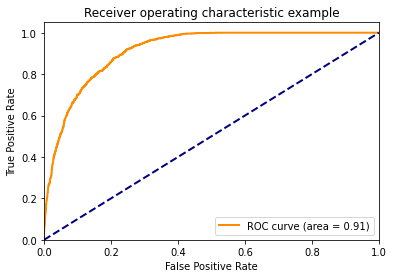

In [28]:
from sklearn.metrics import roc_curve, auc

train_pred_probs = rf_cv.predict_proba(X_train_loe)
pred_probs = pd.Series(train_pred_probs[:, 1])
x, y, _ = roc_curve(y_train, pred_probs)
roc_auc = auc(x, y)

plt.figure()
lw = 2
plt.plot(x, y, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [29]:
rf_importance = pd.Series(rf_cv.best_estimator_.feature_importances_, index=X_train_loe.columns).sort_values(ascending=False)
rf_importance

Reviews           0.619491
Genres            0.190516
Category          0.101834
Content Rating    0.042807
Price             0.034105
Type              0.011248
dtype: float64